# Build Example Plots

![[Open in Colab](https://colab.research.google.com/github/MNoichl/opinionated/blob/master/build_example_plots.ipynb)](https://colab.research.google.com/assets/colab-badge.svg)

# Building the example plots

First, we make the standard plot.
°°°"""
## Imports / Setup


In [1]:
# ruff: noqa: E402, F401
%load_ext autoreload
%autoreload 2
from typing import Optional
from opinionated import reload_styles
import seaborn as sns
import opinionated
from matplotlib import font_manager as fm, pyplot as plt

import os
import shutil
import matplotlib
from pathlib import Path
import pandas as pd

from opinionated import PROJECT_DIR, STYLES_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = PROJECT_DIR.joinpath('outputs')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

penguins = sns.load_dataset("penguins")

## Helper Functions


In [3]:
def savefig(
        fname: str,
        outdir: Optional[os.PathLike] = None,
):
    outdir = OUTPUT_DIR if outdir is None else outdir
    # fig = plt.gcf()
    ext = {'png', 'svg'}
    print(f"Saving {fname} to {outdir}")
    for ext in ext:
        edir = Path(outdir).joinpath(f"{ext}s")
        edir.mkdir(exist_ok=True, parents=True)
        outfile = Path(edir).joinpath(f"{fname}.{ext}")
        plt.savefig(outfile, dpi=450, bbox_inches='tight')

In [4]:
import os
import seaborn as sns
from opinionated import STYLES, set_title_and_suptitle, add_attribution
import colormaps as cmaps

def make_plot(name: str) -> tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots()
    cmap = sns.color_palette(list(cmaps.bold[2:5]._colors))
    sns.scatterplot(
        x="bill_length_mm",
        y="flipper_length_mm",
        data=penguins,
        hue='species',
        style='species',
        palette=cmap,
        alpha=0.75,
    )
    # opinionated.add_legend()
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
    set_title_and_suptitle(
        "Penguins",
        "An Excellent Bird!"
    )
    savefig(f"penguins_{name}")
    return fig, ax

Saving penguins_default to /Users/samforeman/projects/saforem2/opinionated/outputs


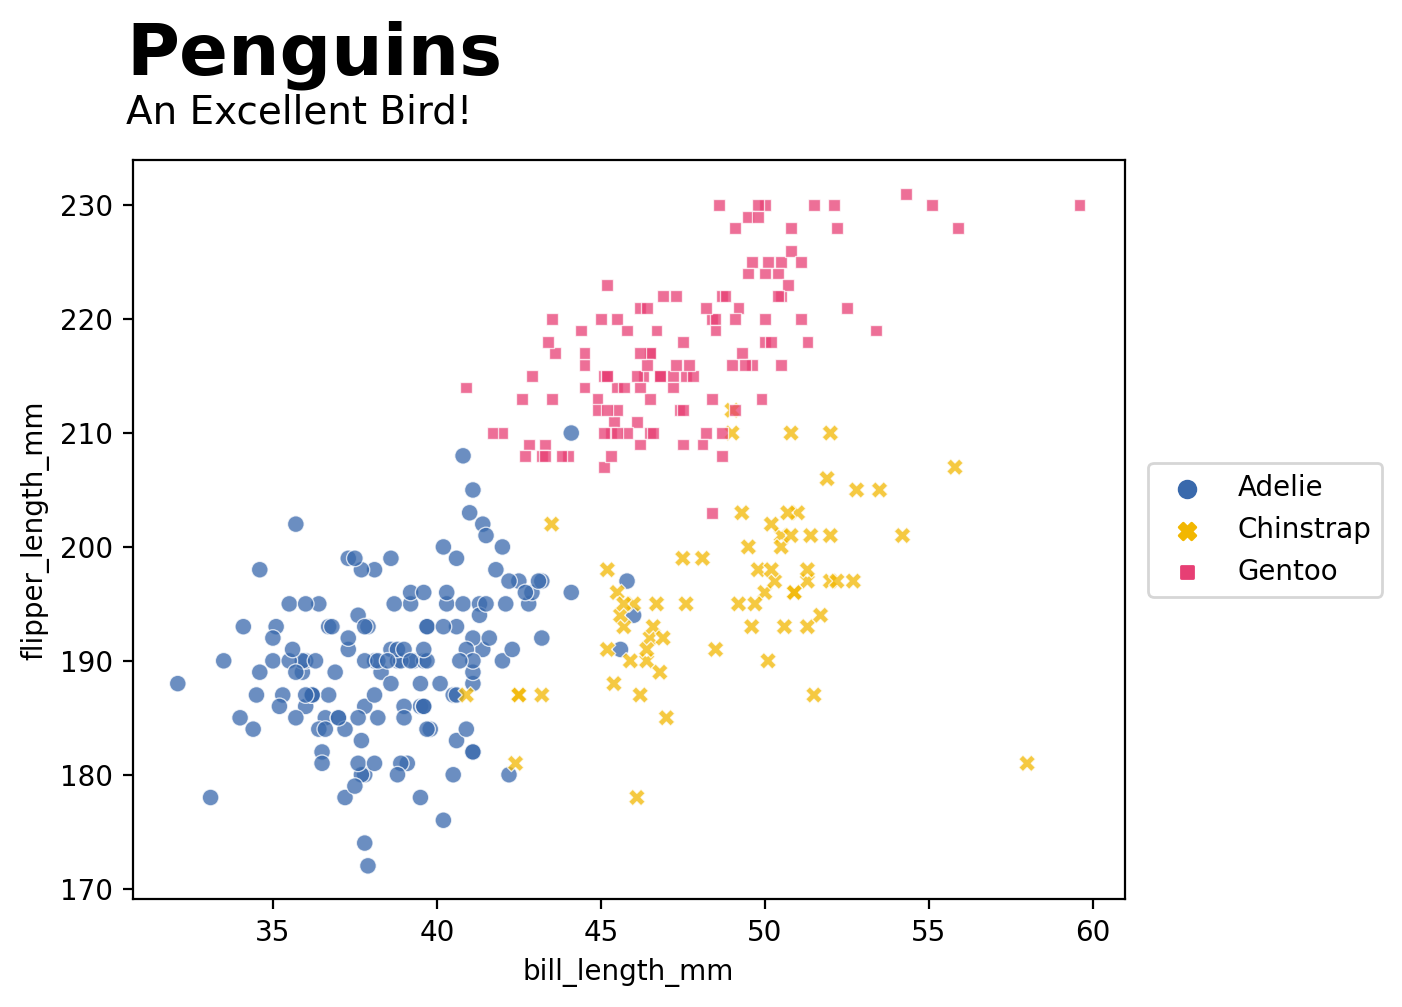

In [5]:
plt.style.use('default')
make_plot('default')
reload_styles()

## All Default Styles


Saving penguins_default to /Users/samforeman/projects/saforem2/opinionated/outputs


Saving penguins_minimal to /Users/samforeman/projects/saforem2/opinionated/outputs


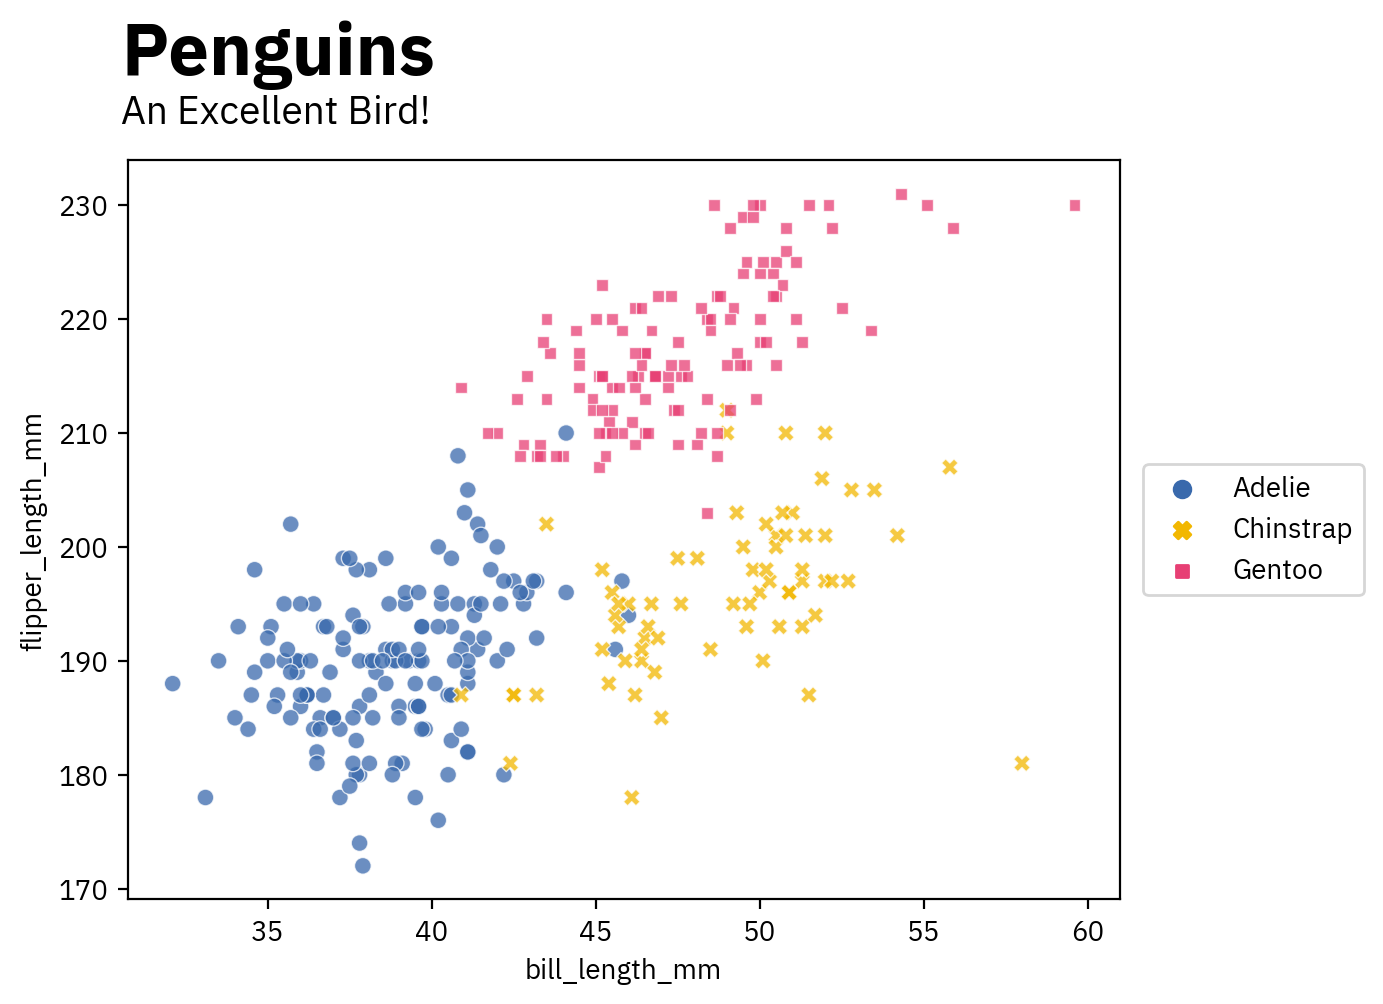

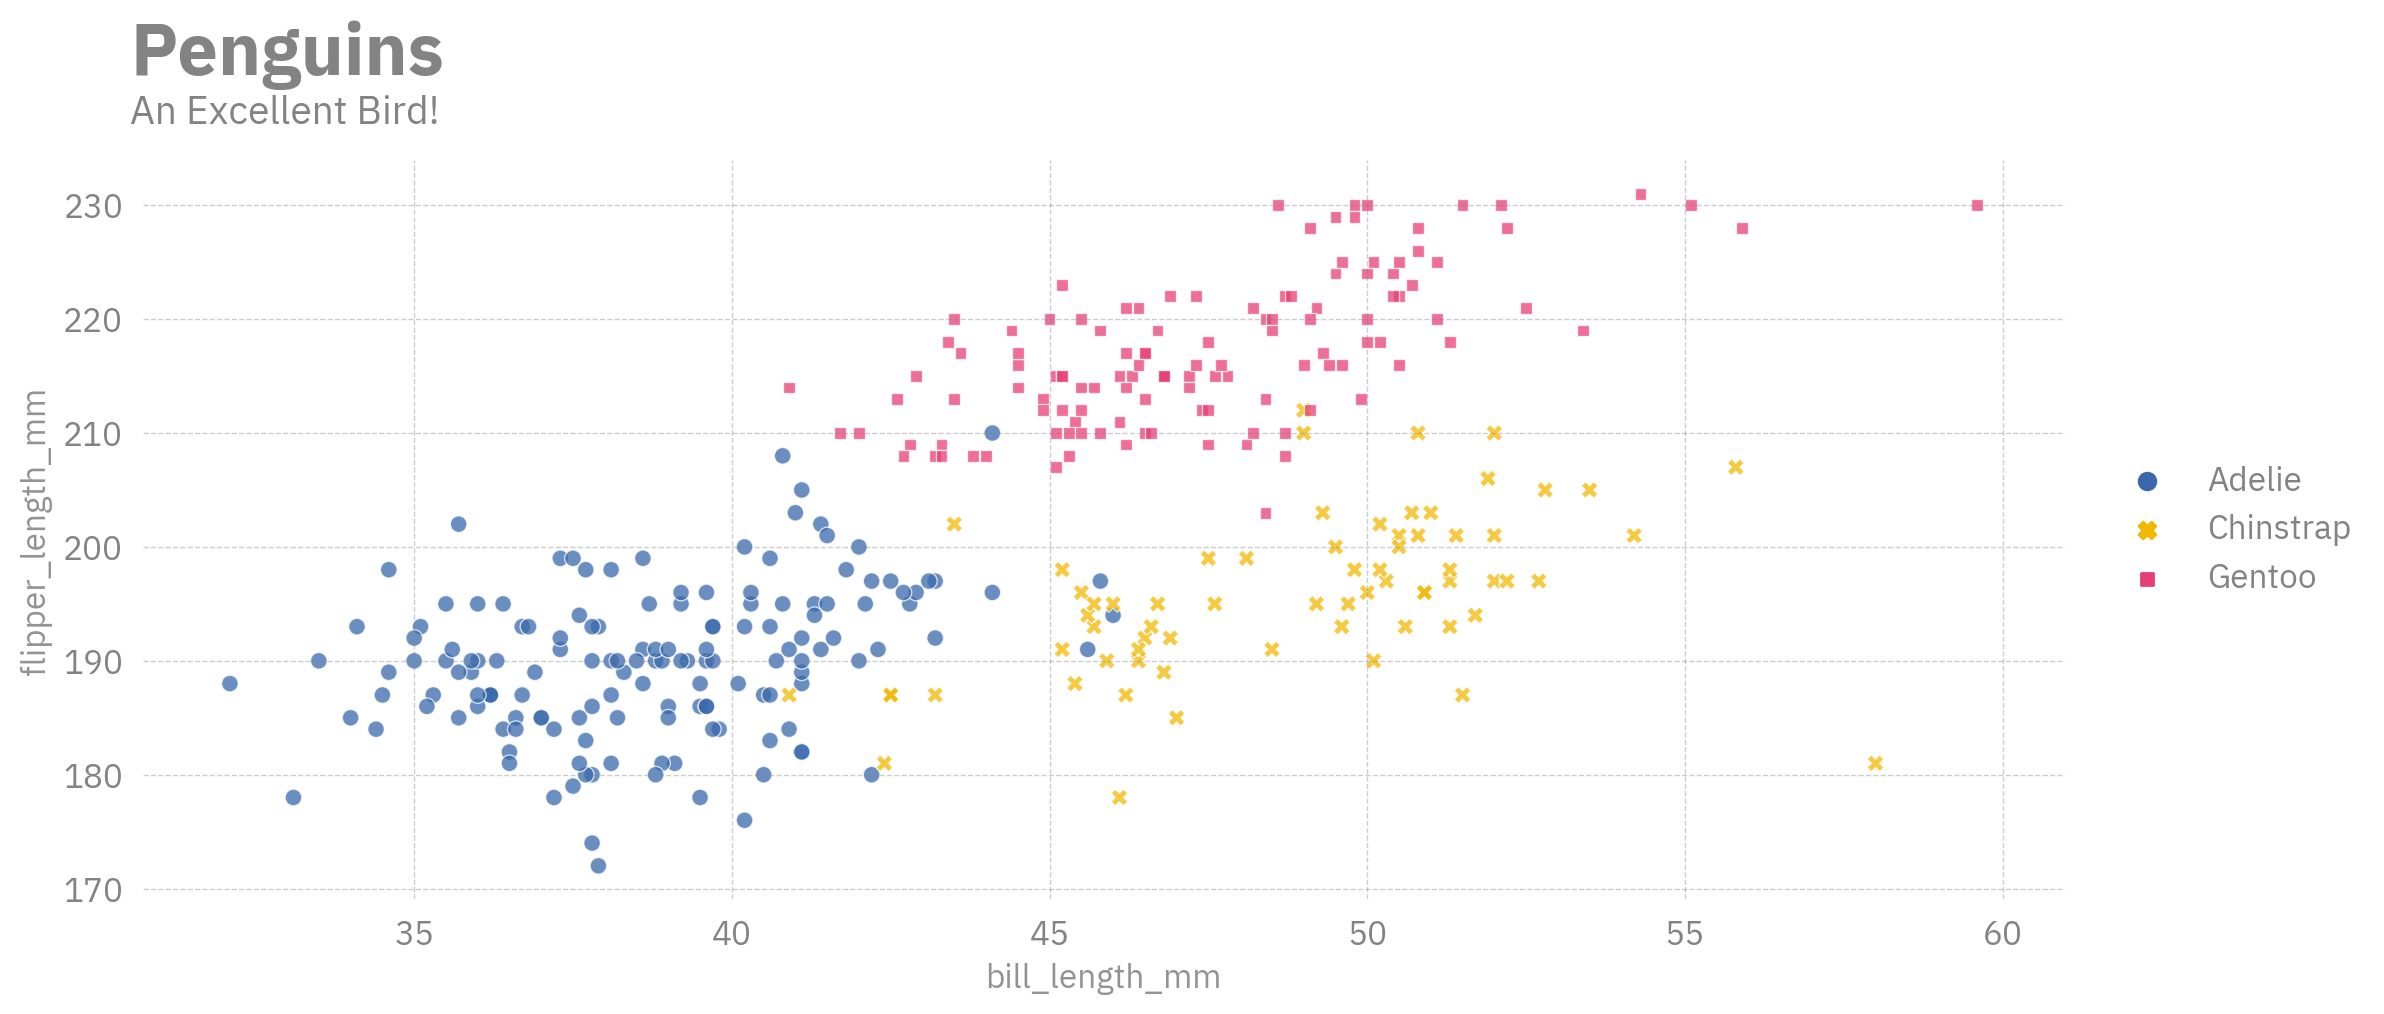

Saving penguins_opinions to /Users/samforeman/projects/saforem2/opinionated/outputs


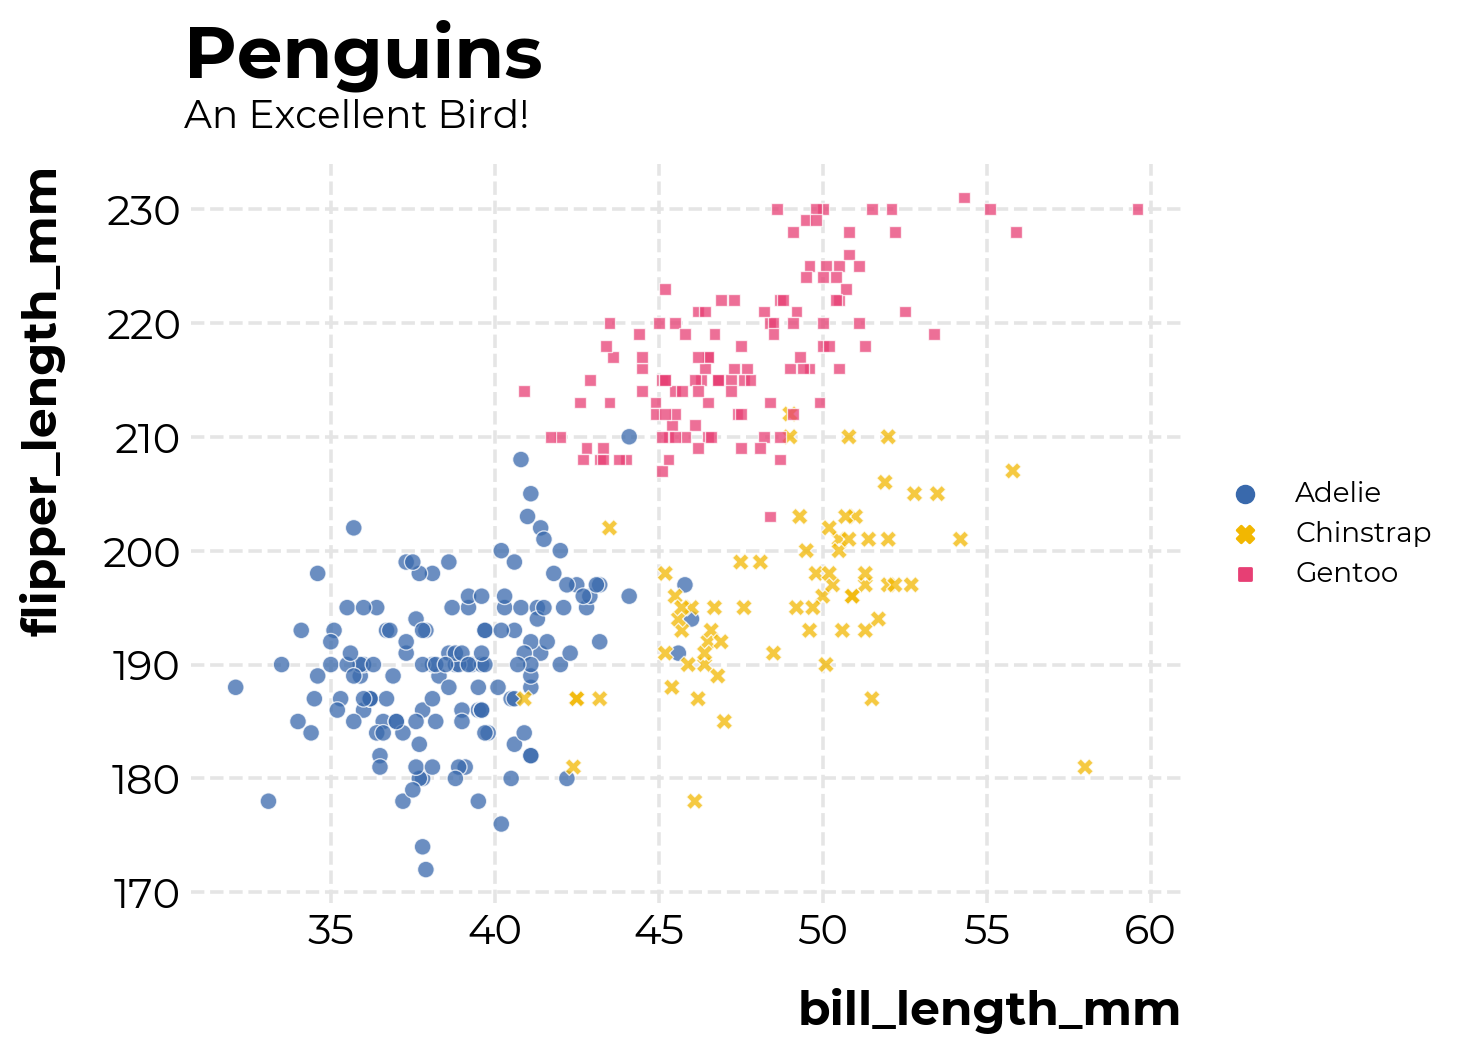

Saving penguins_opinionated_min to /Users/samforeman/projects/saforem2/opinionated/outputs


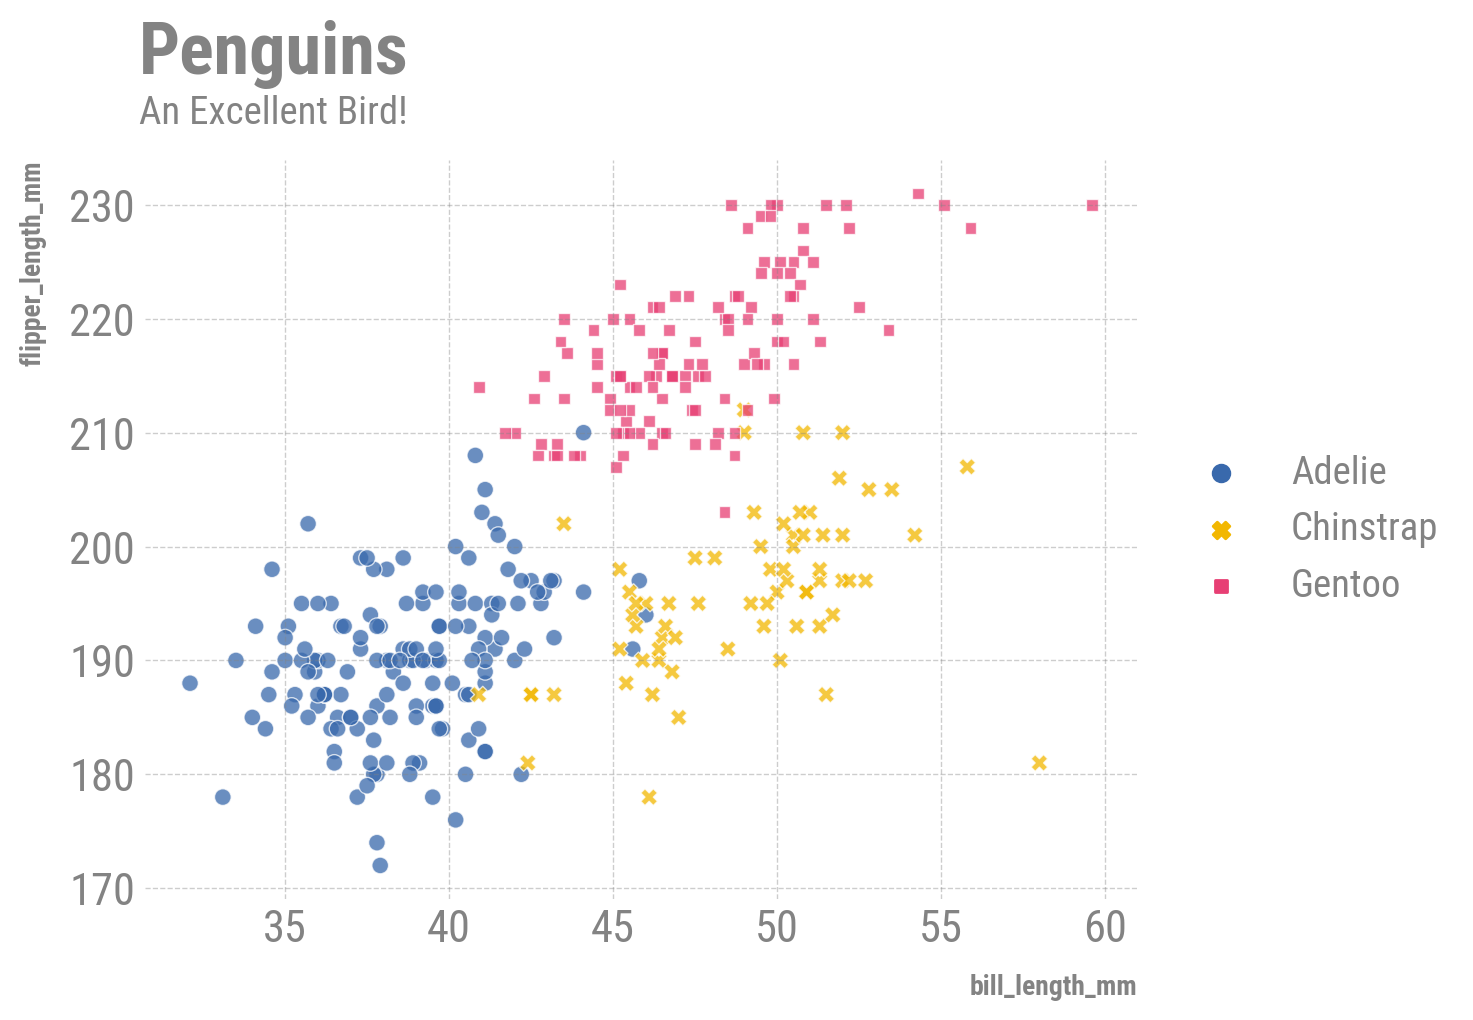

Saving penguins_opinionated_fsc to /Users/samforeman/projects/saforem2/opinionated/outputs


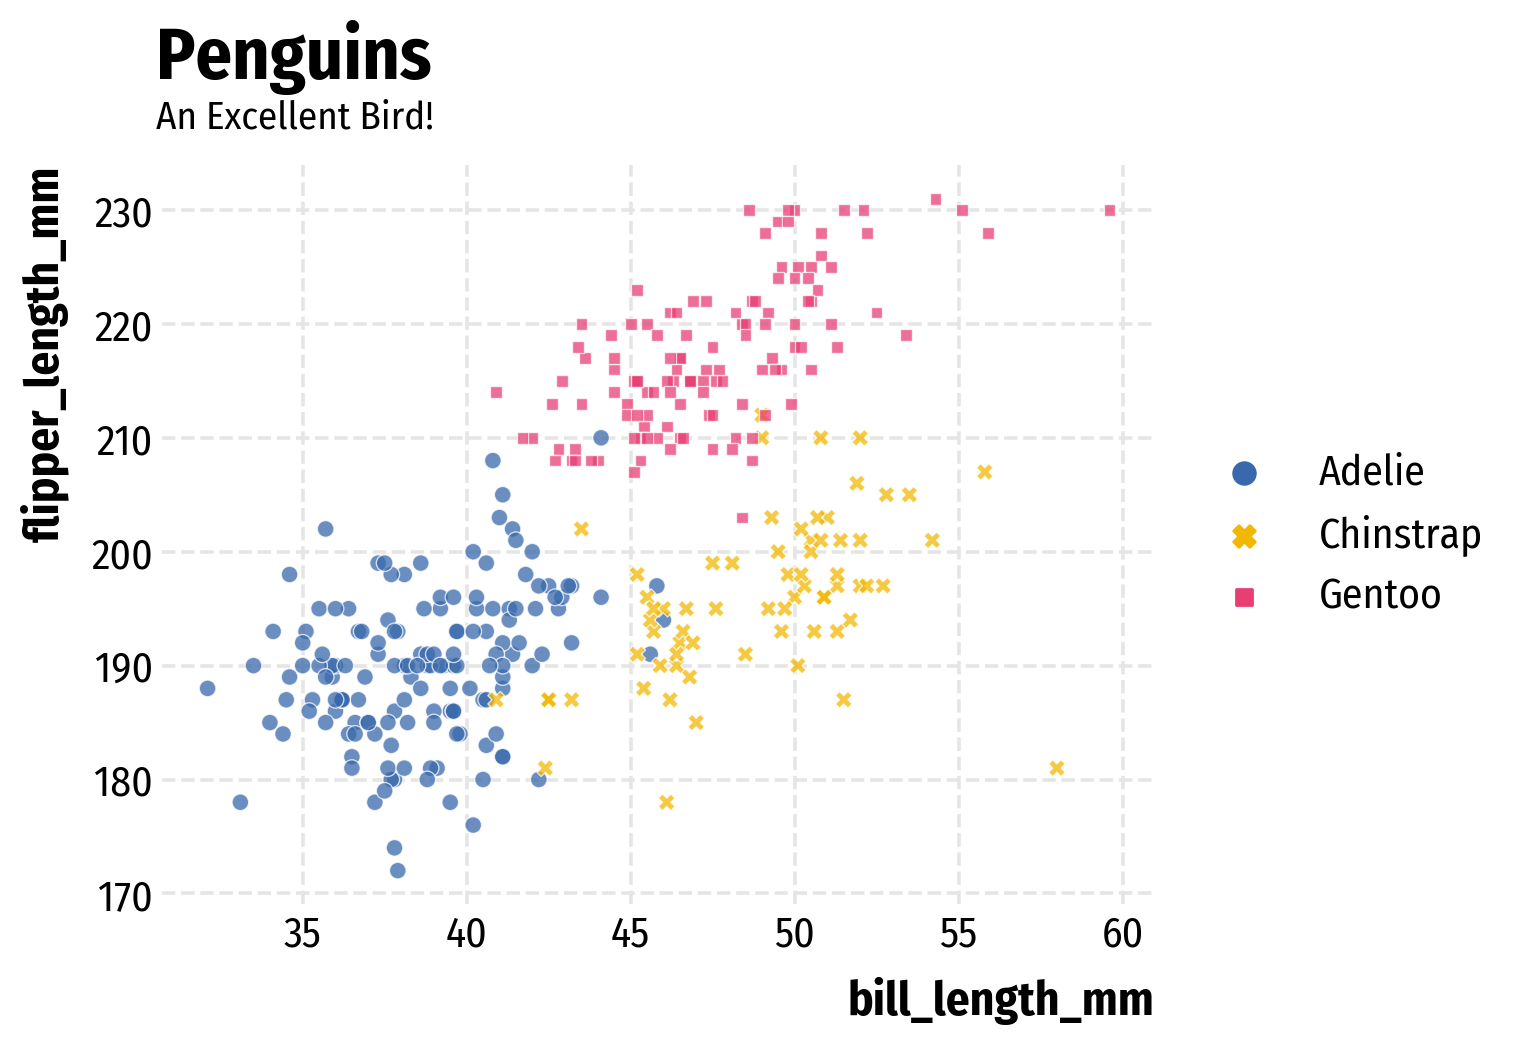

Saving penguins_opinionated_tw to /Users/samforeman/projects/saforem2/opinionated/outputs


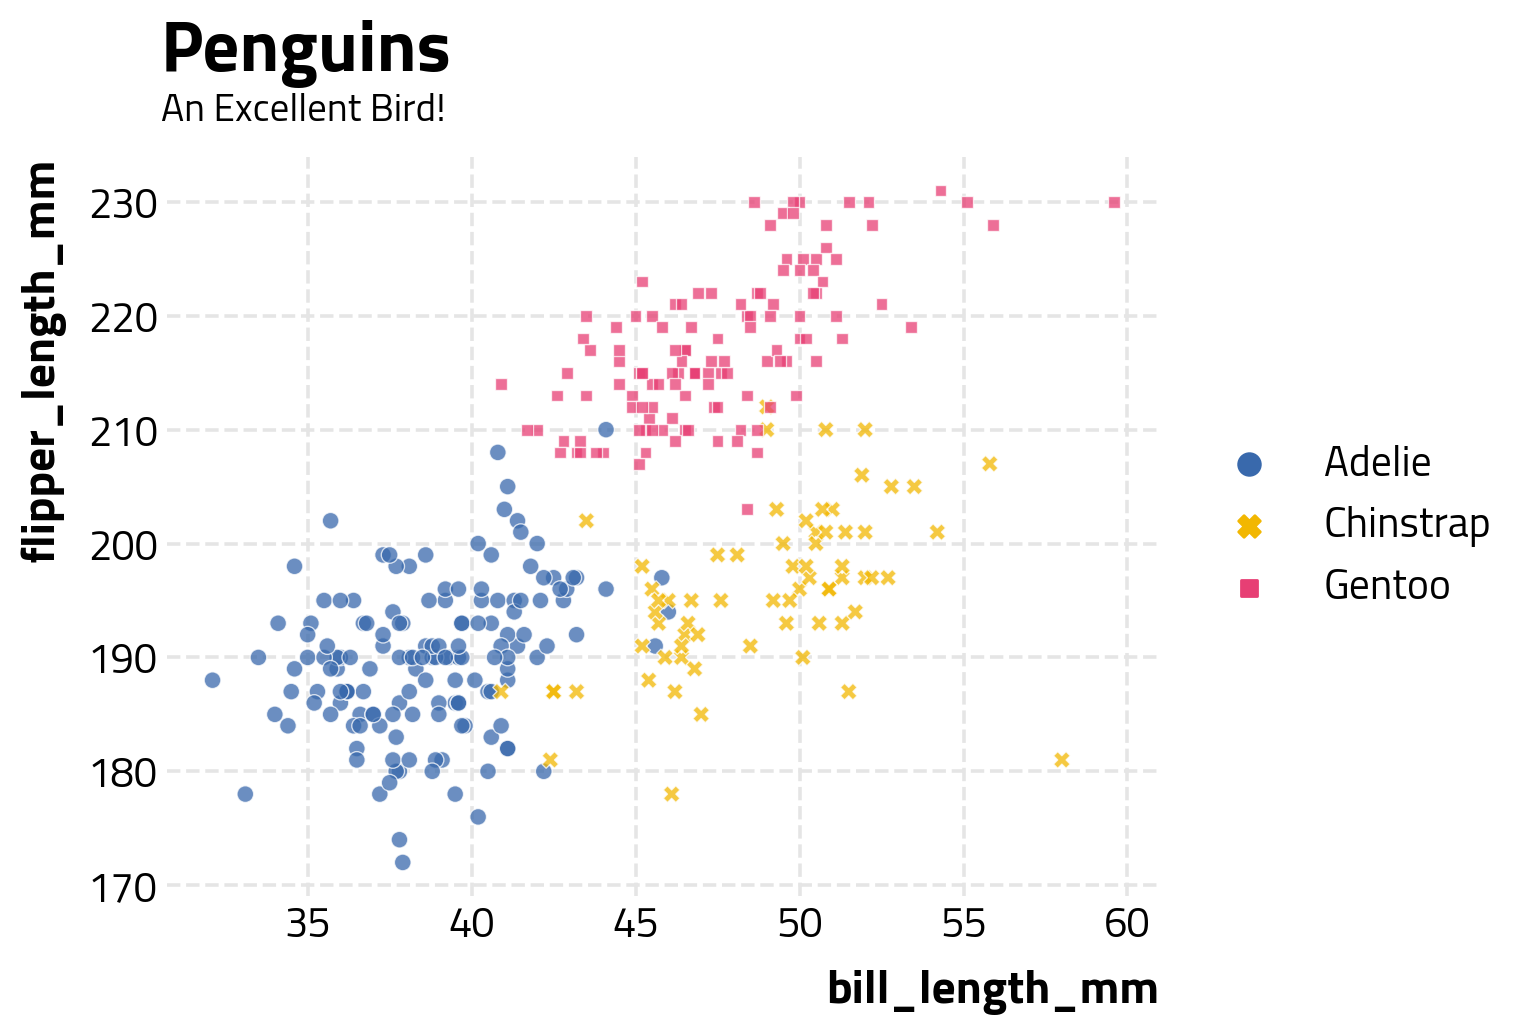

Saving penguins_opinionated_rc to /Users/samforeman/projects/saforem2/opinionated/outputs


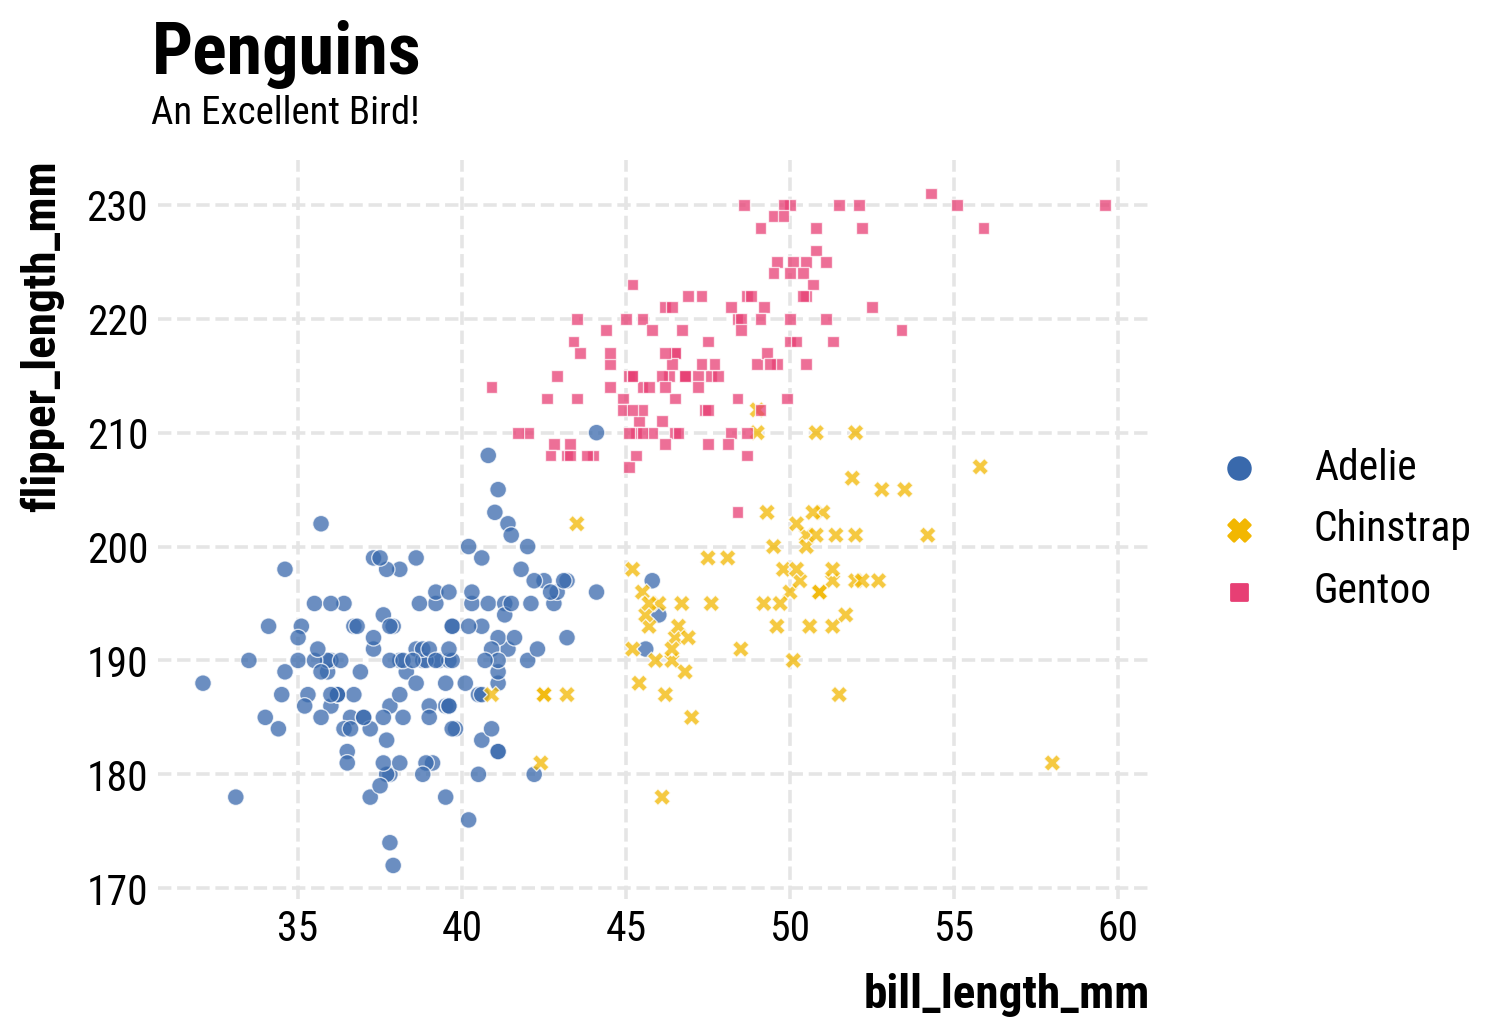

Saving penguins_minimal-new to /Users/samforeman/projects/saforem2/opinionated/outputs


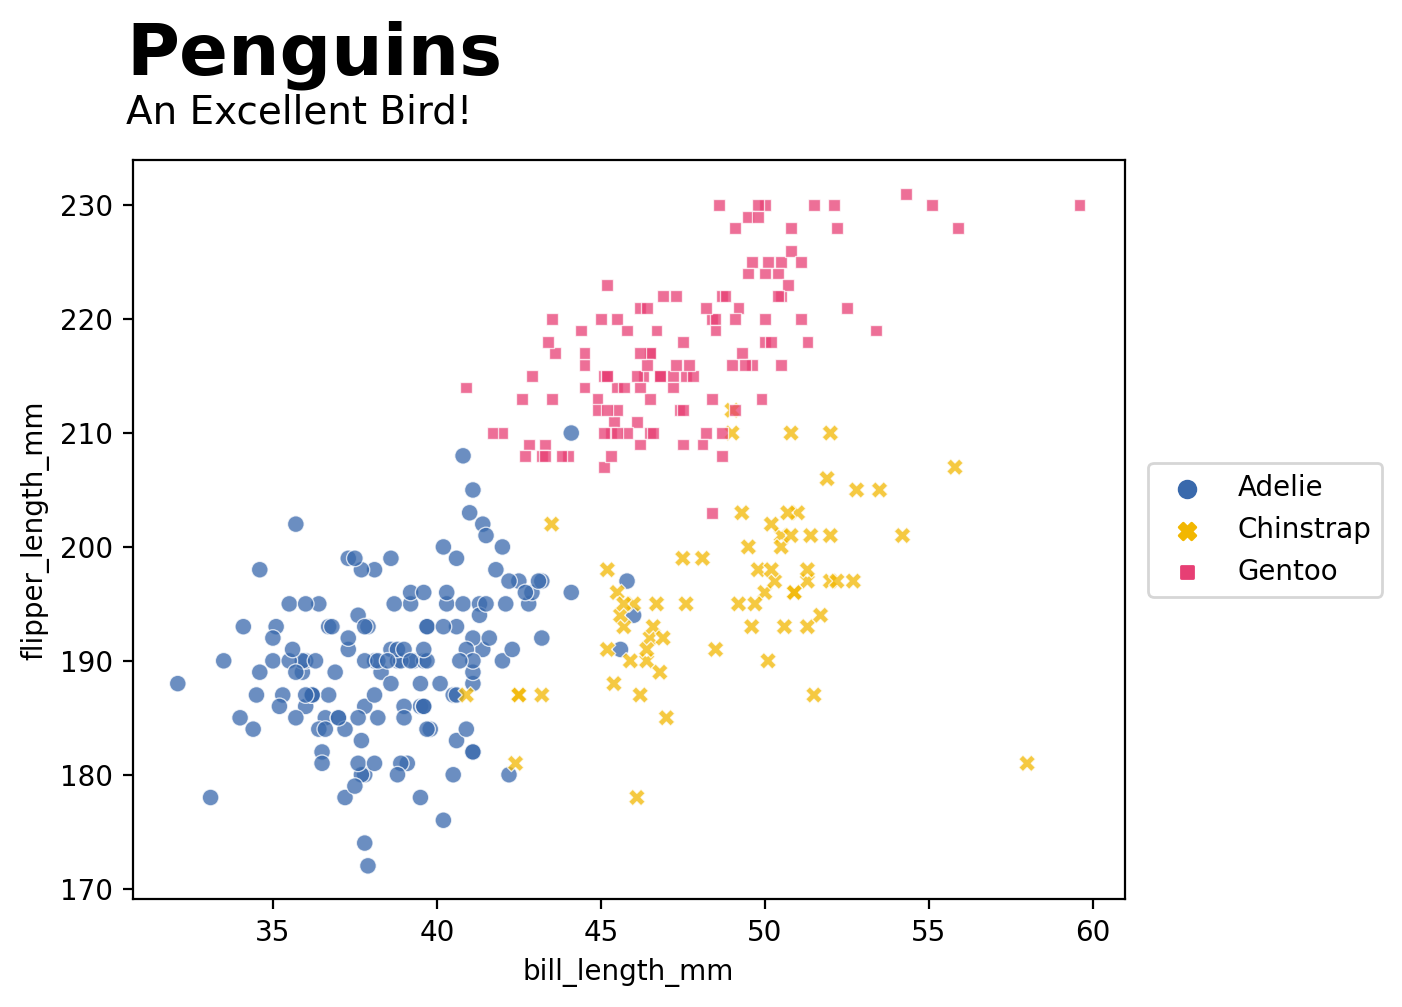

Saving penguins_opinionated_m to /Users/samforeman/projects/saforem2/opinionated/outputs


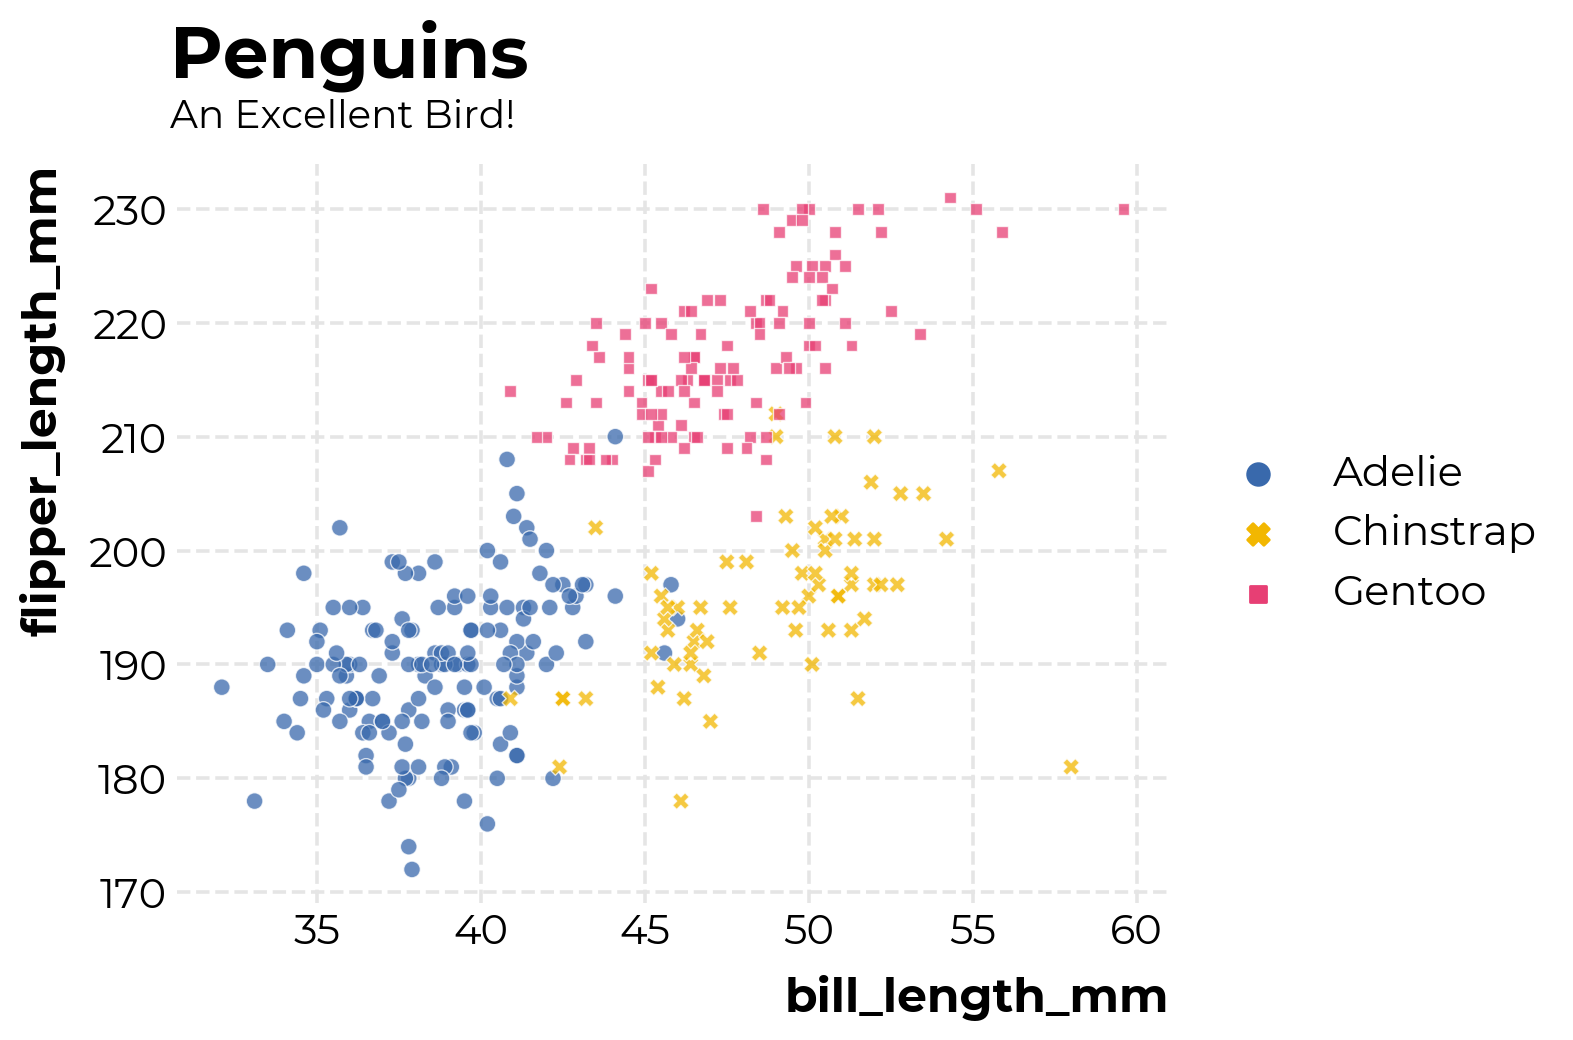

Saving penguins_opinionated_bw to /Users/samforeman/projects/saforem2/opinionated/outputs


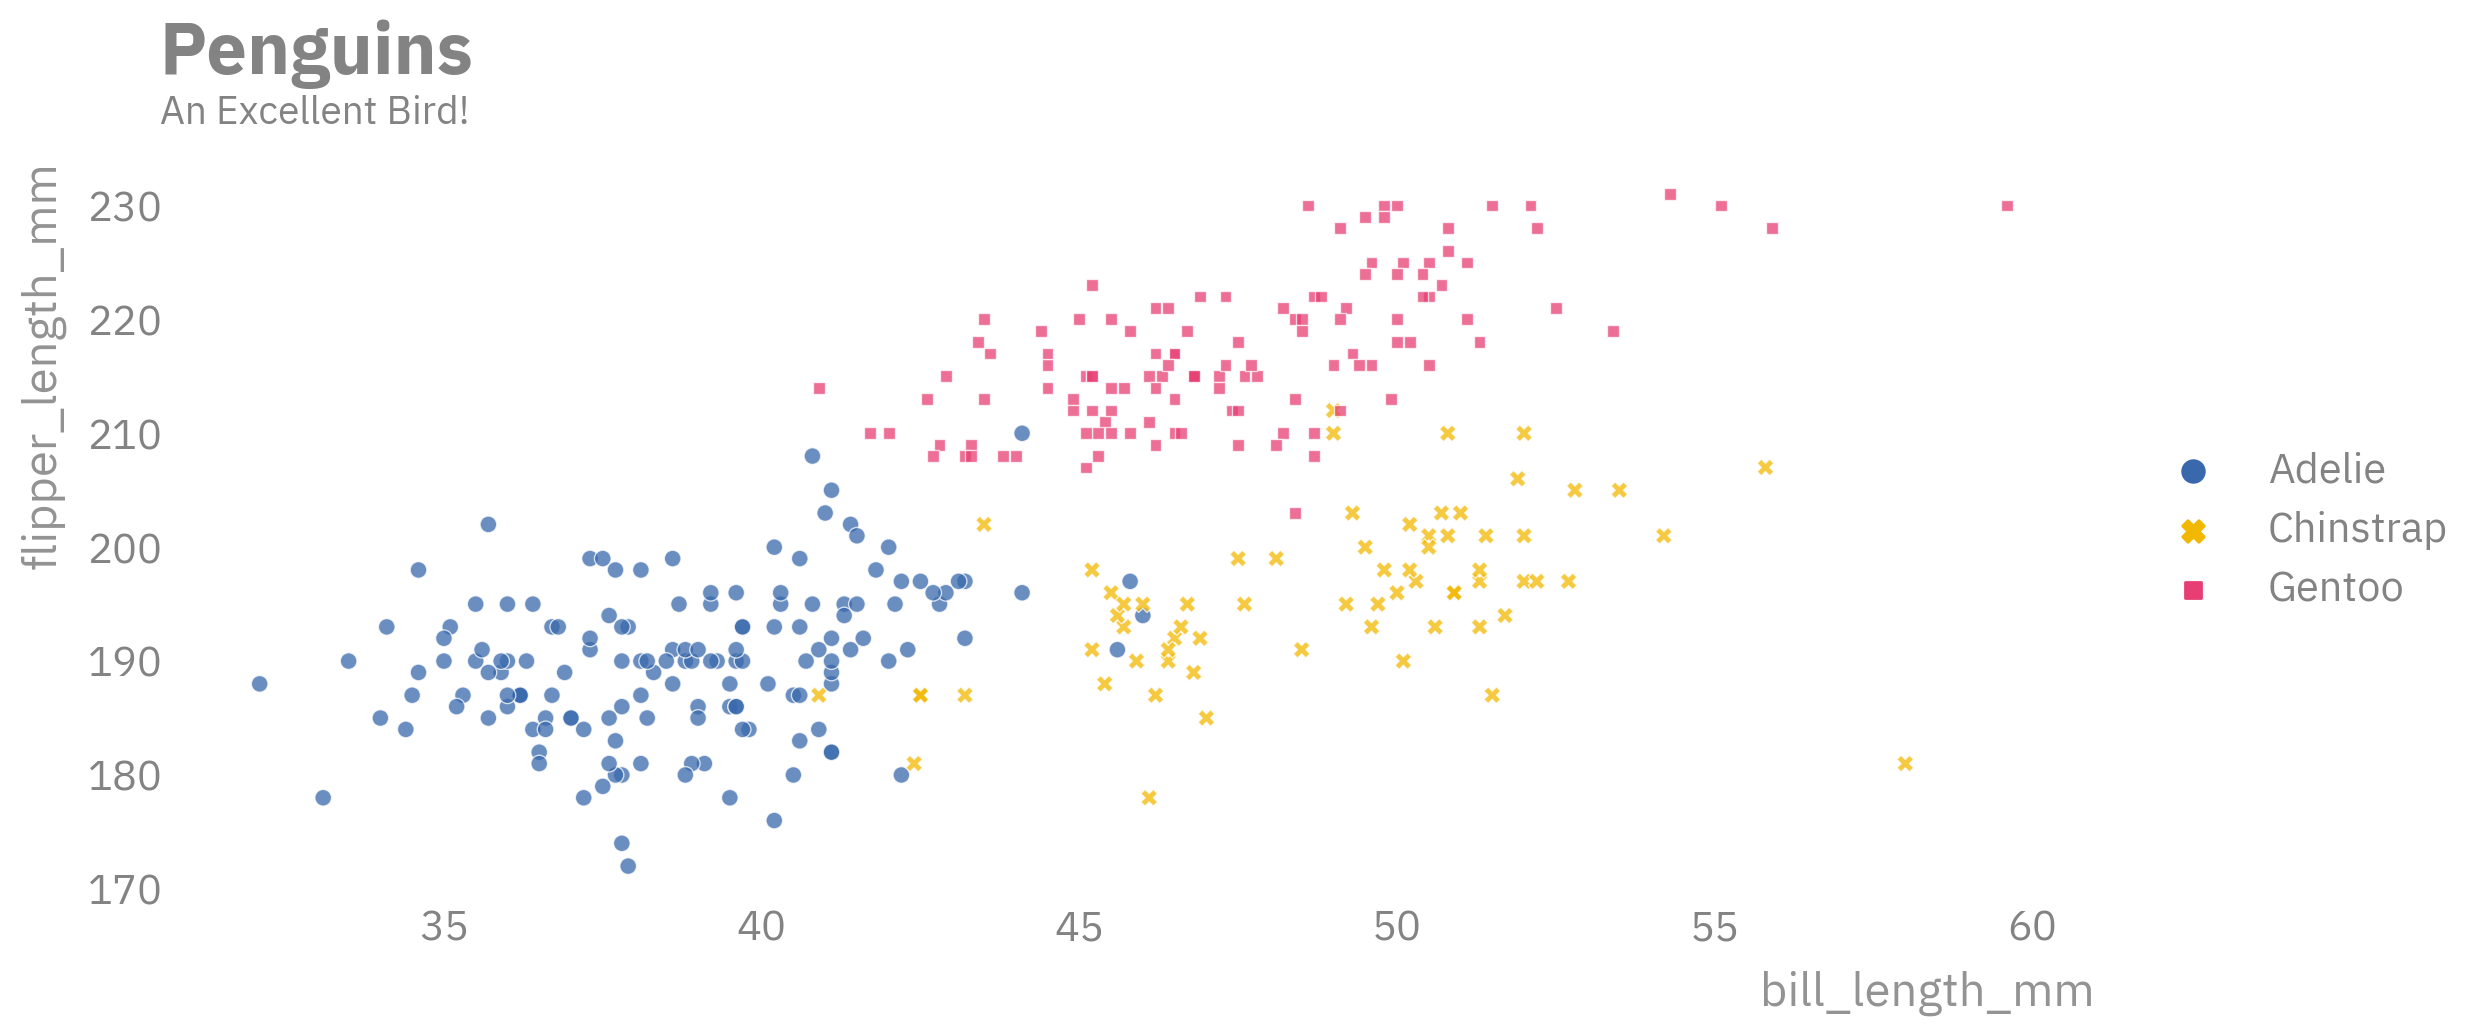

Saving penguins_opinionated_sg to /Users/samforeman/projects/saforem2/opinionated/outputs


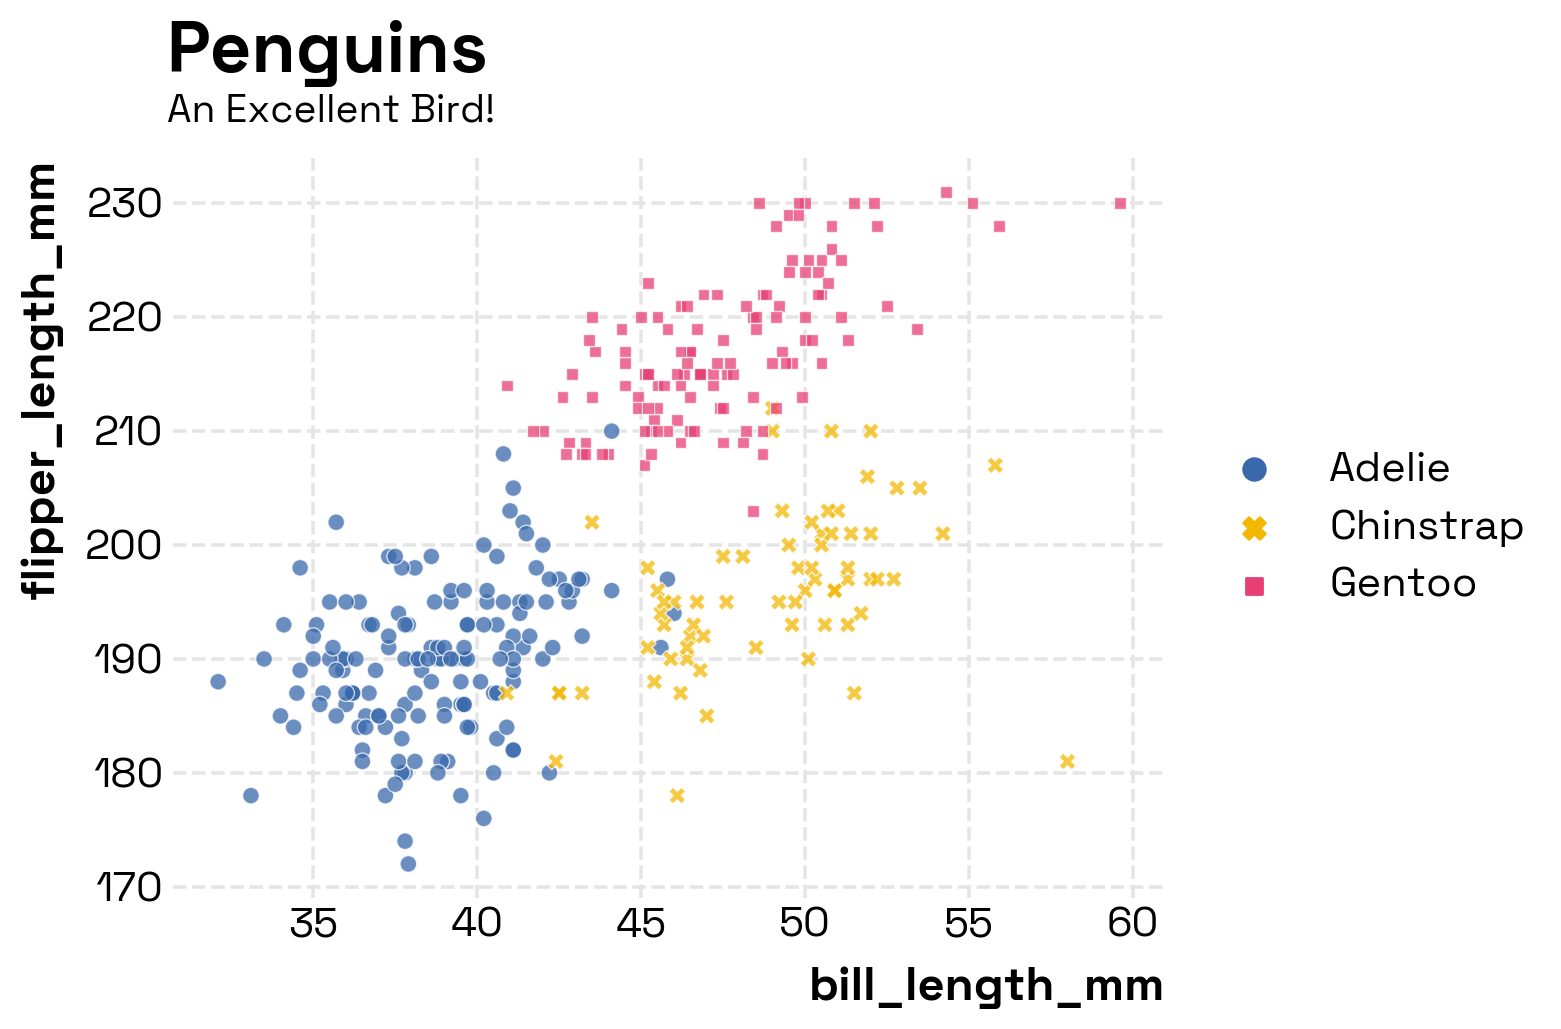

Saving penguins_opinionated_j to /Users/samforeman/projects/saforem2/opinionated/outputs


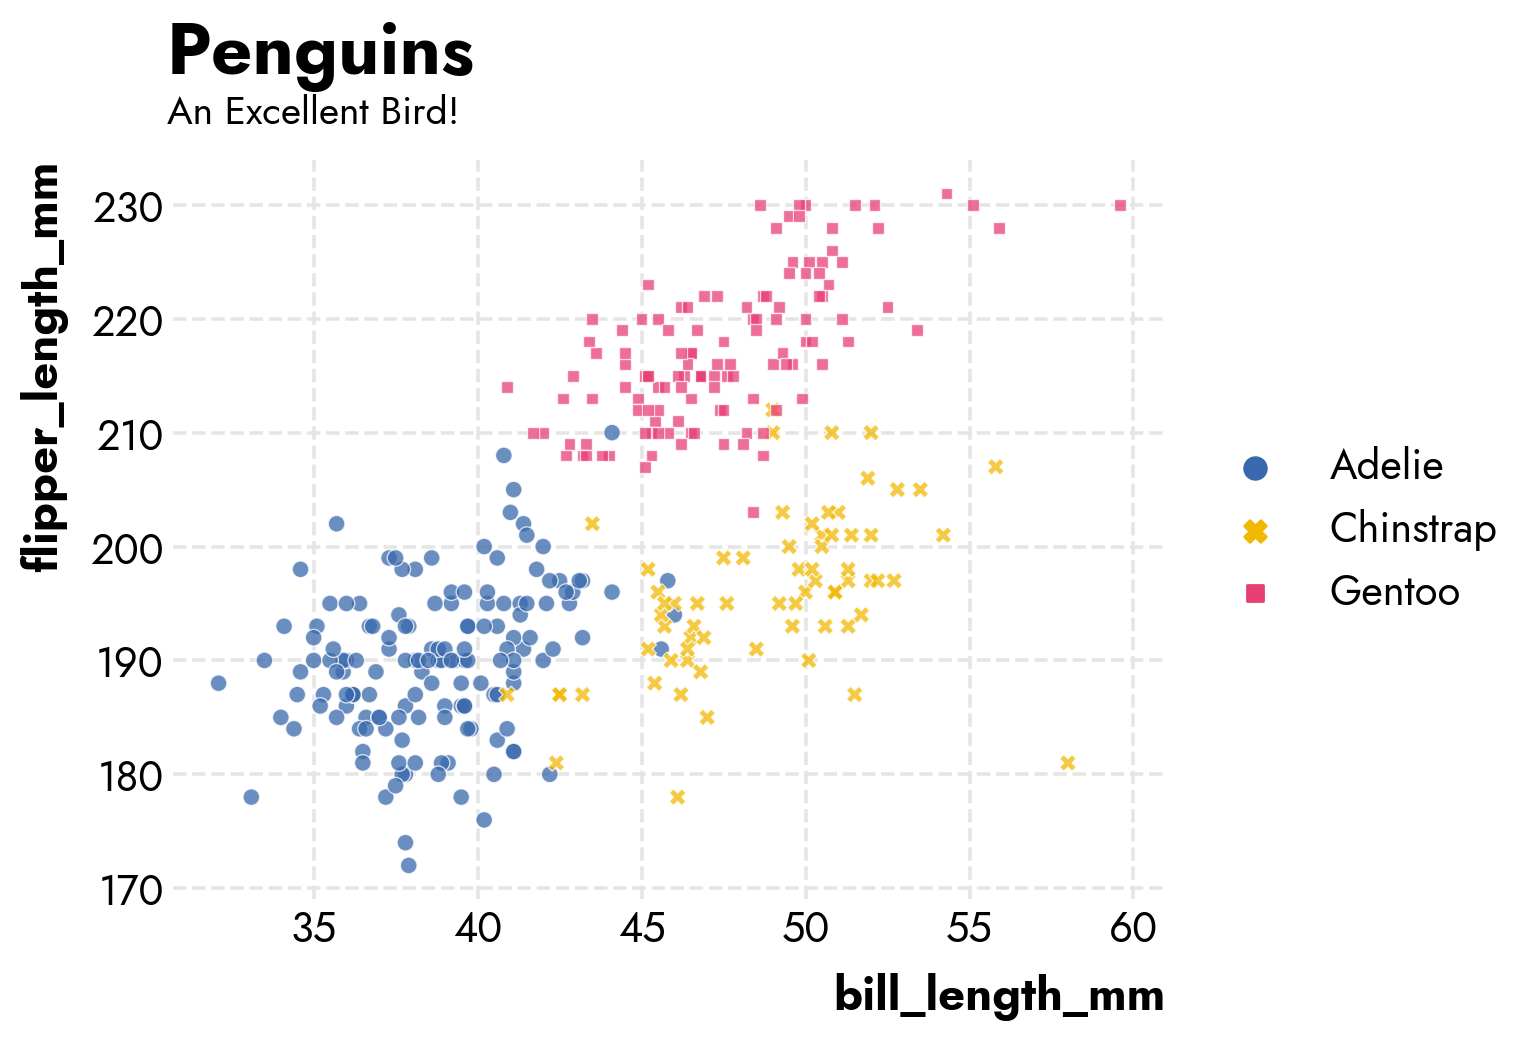

In [6]:
with plt.style.context('default'):
    make_plot('default')

for name, stylefile in STYLES.items():
    with plt.style.context(Path(stylefile).as_posix()):
        fig, ax = make_plot(name)
        plt.show()